In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import hilbert


In [48]:
a = 10
b = 5
c = 2

#A = np.array([[a,c],
#            [c,b]])
#A = np.eye(2,2,k=-1)*-1 + np.eye(2,2)*2 + np.eye(2,2,k=1)*-1

A = hilbert(2)
b = np.array([[1],
             [1]])
x0 = np.array([[ -5],
               [-10]])
r0 = b - np.matmul(A,x0)
print("Cond(A) = " , np.linalg.cond(A))

Cond(A) =  19.28147006790397


In [44]:
def J(x,y,A,b) :
    return 0.5*A[0,0]*x*x+A[0,1]*x*y+0.5*A[1,1]*y*y -b[0]*x-b[1]*y 

x,y = np.mgrid[-10:10:0.5,-10:10:0.5]
z = J(x,y,A,b)

In [45]:
def descente(Nmax,tol,A,b,X):
    ité = 0
    w = b - np.matmul(A,X)    #direction de descente -> le gradient (résidu)
    
    normeR = np.matmul(w.T,w)
    evolution_residu = np.array([normeR])
    evolution_X = [[X[0],X[1]]]
    for k in range(Nmax) :
        ité += 1
        Aw = np.matmul(A,w)
        z = normeR / np.matmul(w.T,Aw)
        X = X + z * w
        evolution_X = np.vstack((evolution_X,[[X[0],X[1]]]))
        w = b - np.matmul(A,X)
        normeR = np.matmul(w.T,w)
        evolution_residu=np.vstack((evolution_residu,[normeR]))
        if normeR < tol :
            break
       
    return evolution_X , evolution_residu, ité

In [46]:
Nmax = 100
Xsucc, Rsucc, ité = descente(Nmax,1e-10,A,b,x0)    #tableau des valeurs de X et residu au fur est à mesure de l'algo

X1 = Xsucc[:,0]    #coordonnée x
X2 = Xsucc[:,1]    #coordonnée y
normeResidu = Rsucc[:,0]
print(normeResidu)

[[1.67694444e+02]
 [6.28125026e-01]
 [7.49710586e-01]
 [2.80815493e-03]
 [3.35172680e-03]
 [1.25544021e-05]
 [1.49845457e-05]
 [5.61268930e-08]
 [6.69913219e-08]
 [2.50926177e-10]
 [2.99497717e-10]
 [1.12181421e-12]]


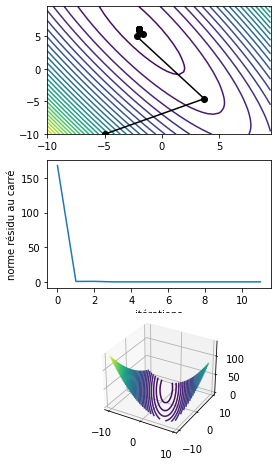

In [47]:
fig = plt.figure(figsize=plt.figaspect(2.))
ax = fig.add_subplot(3, 1, 1)
contours = ax.contour(x,y,z,30)
ax.plot(X1,X2,'k-o')

ax = fig.add_subplot(3, 1, 2)

ax.plot([k for k in range(ité+1)],normeResidu)
ax.set_xlabel("itérations")
ax.set_ylabel("norme résidu au carré")

ax = fig.add_subplot(3, 1, 3, projection='3d')
surf = ax.contour(x,y,z,50)
plt.show()